<a href="https://colab.research.google.com/github/Parkhat-archive/Data-Science-Portfolio/blob/master/LSTM_APPLE_STOCK_PREDICITON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Long Short Term Memory (LSTM)

In [2]:
import math
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [3]:
#Get the stock
df= web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-05-15')
#show the data
print(df)

                  High         Low  ...      Volume   Adj Close
Date                                ...                        
2012-01-03   58.928570   58.428570  ...  75555200.0   50.857235
2012-01-04   59.240002   58.468571  ...  65005500.0   51.130558
2012-01-05   59.792858   58.952858  ...  67817400.0   51.698215
2012-01-06   60.392857   59.888573  ...  79573200.0   52.238651
2012-01-09   61.107143   60.192856  ...  98506100.0   52.155792
...                ...         ...  ...         ...         ...
2020-05-11  317.049988  307.239990  ...  36405900.0  315.010010
2020-05-12  319.690002  310.910004  ...  40575300.0  311.410004
2020-05-13  315.950012  303.209991  ...  50155600.0  307.649994
2020-05-14  309.790009  301.529999  ...  39732300.0  309.540009
2020-05-15  307.899994  300.209991  ...  41587100.0  307.709991

[2106 rows x 6 columns]


In [4]:
df.shape

(2106, 6)

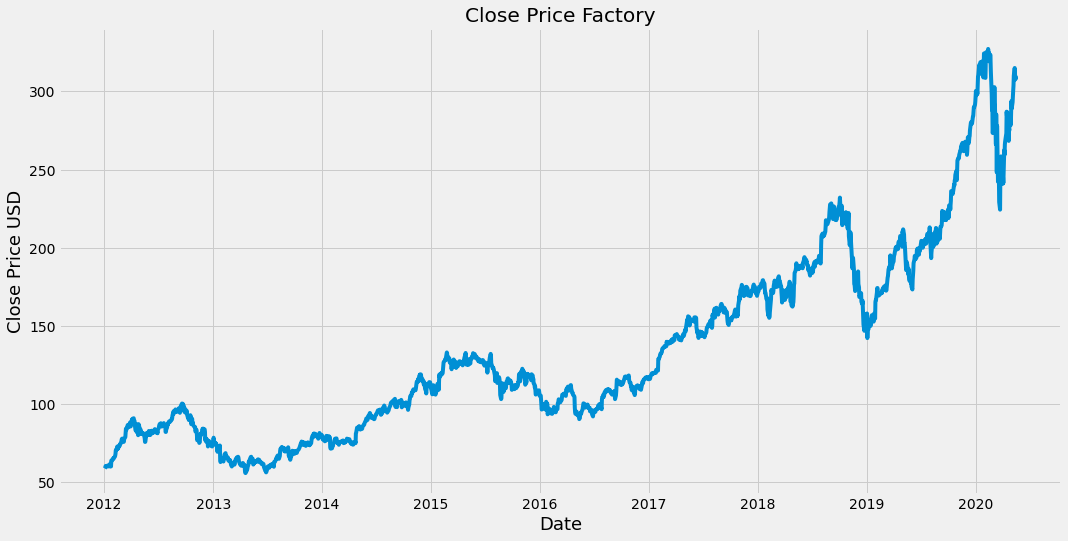

In [5]:
#visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price Factory')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.show()

In [6]:
#Create new dataframe with only CLOSE column
data=df.filter(['Close'])
#conver to numpy array
dataset=data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

1685

In [7]:
#Scale the Data
#Good Practice!! Helps to be more precise

scaler=MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01089548],
       [0.01205872],
       [0.01447467],
       ...,
       [0.92796869],
       [0.93493238],
       [0.92818975]])

In [8]:
#Create Training DataSet
train_data= scaled_data[0:training_data_len, :]
#Split the Data intp x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)

[array([0.01089548, 0.01205872, 0.01447467, 0.01677483, 0.01642217,
       0.01721696, 0.01685378, 0.01624321, 0.01541158, 0.01798544,
       0.02030665, 0.01959081, 0.01566949, 0.01941185, 0.01572739,
       0.02954412, 0.02847562, 0.02987047, 0.03288645, 0.03471289,
       0.03456025, 0.03399706, 0.03639722, 0.03865526, 0.04121335,
       0.04534521, 0.05402475, 0.05415633, 0.05898825, 0.06259901,
       0.05639331, 0.05878296, 0.0587356 , 0.06543606, 0.06448335,
       0.06624662, 0.06941526, 0.07117856, 0.07625785, 0.07995811,
       0.08102658, 0.0814003 , 0.07507357, 0.07354712, 0.07377347,
       0.07972122, 0.08139505, 0.08499001, 0.09346428, 0.10477032,
       0.10265438, 0.10265964, 0.11083389, 0.11339195, 0.11157078,
       0.10990752, 0.10817582, 0.11392883, 0.11787649, 0.11952923])]
[0.11544472908538655]
[array([0.01089548, 0.01205872, 0.01447467, 0.01677483, 0.01642217,
       0.01721696, 0.01685378, 0.01624321, 0.01541158, 0.01798544,
       0.02030665, 0.01959081, 0.015

In [9]:
#Convert the x_train and y_train to numpy
x_train, y_train= np.array(x_train), np.array(y_train)

In [10]:
#rehsape the data
x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(1625, 60, 1)

In [11]:
#Built LSTM model
model= Sequential()
#add layer
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
#add 2nd layer 
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [12]:
#Compile the model
model.compile(optimizer='adam', loss="mean_squared_error")

In [13]:
#train the model
model.fit(x_train,y_train, batch_size=1, epochs=1)

Epoch 1/1
1625/1625 [==============================] - 78s 48ms/step - loss: 7.5555e-04


In [14]:
#Create the testing dataset
#create new arry of Scaled values from index 1543 to 2003
test_data=scaled_data[training_data_len -60:, :]
#Create the datasets x_test and y_test
x_test=[]
y_test= dataset[training_data_len:,:]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [15]:
#Conver the data to the numpy array
x_test=np.array(x_test)


In [16]:
#reshape the model
x_test= np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

In [17]:
#Get the model predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)


In [18]:
#Evaluate the model
#Get the Root squared error (RMSE)
rmse= np.sqrt(np.mean(predictions-y_test)**2)
rmse

13.709046461236731

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


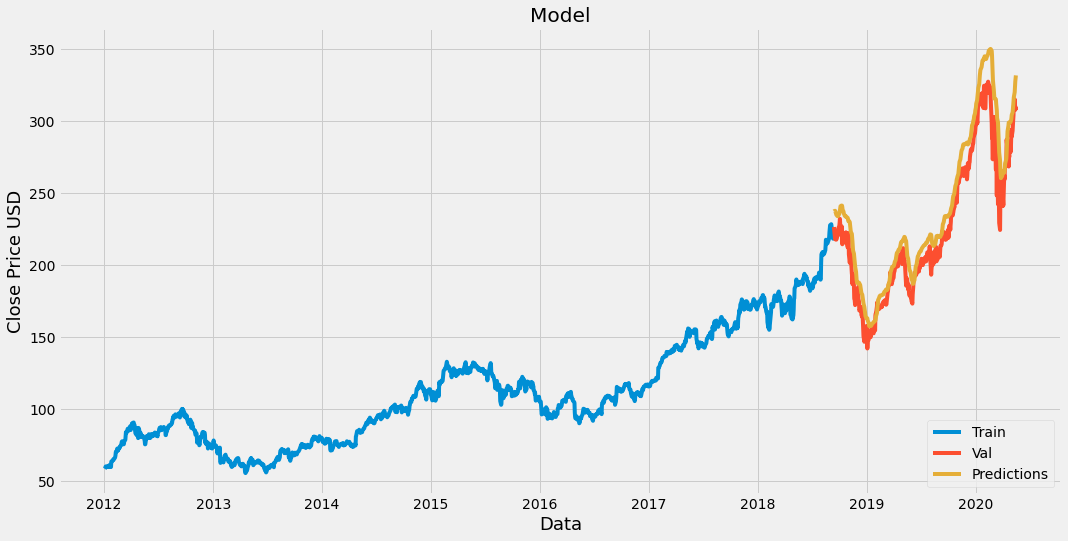

In [19]:
#Plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [20]:
#Show the valid prices and predicted prices
valid

,Close,Predictions
Date,,
2018-09-13,226.410004,237.321152
2018-09-14,223.839996,237.494720
2018-09-17,217.880005,237.642761
2018-09-18,218.240005,237.107697
2018-09-19,218.369995,236.324631
...,...,...
2020-05-11,315.010010,319.865662
2020-05-12,311.410004,323.896820
2020-05-13,307.649994,327.335388


In [21]:
#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get teh last 60 day closing price 
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[293.19623]]


In [22]:
#Get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end='2019-12-18')
print(apple_quote2['Close'])

Date
2019-12-18    279.73999
Name: Close, dtype: float64
